# Final Project

Introduction: Our project seeks to explore factors influencing, and influenced by, teacher attendance in the Philadelphia school system. Using (mostly) 2013 data we constructed 6 hypotheses. First, we hypothesized that school environment, weather and teacher salary would influence teacher attendance. Second, we hypothesized that out of school suspension rate (OSS), occurrence of serious incidents in schools, and school ranking would be influenced by teacher attendance.

# Part 1: Hypotheses regarding factors affected by teacher attendance: suspension rate, serious incident rate, and rank of school.

In [189]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [190]:
%matplotlib inline

In [191]:
def standardize(anylist):
    '''convert any array of numbers to std units '''
    return (anylist - np.mean(anylist)) / np.std(anylist)

In [192]:
def correlation(df, x, y):
    '''correlation between two columns of a dataframe '''
    return np.mean(standardize(df[x]) * standardize(df[y]))

In [193]:
def slope(df, x, y):
    r = correlation(df, x, y)
    return r * np.std(df[y]) / np.std(df[x])

## Hypothesis 1: Higher teacher attendance leads to fewer students receiving one-time suspensions (OSS)

In [194]:
# Load the data
data13 = pd.read_csv('/Users/naomi/Desktop/CIS105/FinalProject/data/data13.csv')

In [195]:
ta13 = pd.read_csv('/Users/naomi/Desktop/CIS105/FinalProject/data/TeacherAttendance/attendance_2013.csv')

In [196]:
merged = data13.merge(ta13, on='ULCS_NO')

In [197]:
# Do some data cleaning
# Get rid of percent signs in Percent columns
def get_num(percent):
    return percent[:-1]

In [198]:
# Find percent of students suspended once
merged['percent_one_time_susp'] = (merged['sch_one_time_susp'] / merged['Total Enrolled']) * 100

In [199]:
merged['white_percent_num'] = merged['White Percent'].apply(get_num)

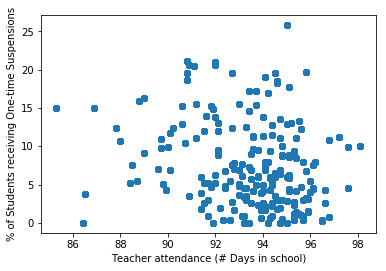

In [200]:
# Plot the data
plt.scatter(merged['SCH_TEACHER_ATTEND_x'], merged['percent_one_time_susp'])
plt.xlabel('Teacher attendance (# Days in school)')
plt.ylabel('% of Students receiving One-time Suspensions')

### We can see a negative correlation- is it statistically significant?
## Hypothesis testing <br>
### H0: There is no correlation between teacher attendance and % student suspensions <br>
### H1: There is a negative correlation between teacher attendance and % student suspensions

Observed value of statistic:

In [201]:
orig_slope, b = np.polyfit(merged['SCH_TEACHER_ATTEND_x'], merged['percent_one_time_susp'], 1)

In [202]:
orig_slope

-0.56988288053427683

Run a simulation in order to compute the distribution of the statistic under the null hypothesis. 

Plot a histogram for this statistic.

In [203]:
merged = merged.pivot_table('SCH_TEACHER_ATTEND_x', index=['School Name', 'percent_one_time_susp', 'white_percent_num'])

In [204]:
merged = merged.reset_index()

In [205]:
slopes = []
num_samples = 5000
for x in np.arange(1, num_samples): 
    indices = np.random.choice(np.arange(0, len(merged)), len(merged), replace = False)
    teach_attend = merged['SCH_TEACHER_ATTEND_x'][indices]
    score = merged['percent_one_time_susp']
    m, b = np.polyfit(teach_attend, score, 1)
    slopes.append(m)

(array([    3.,    21.,   120.,   468.,  1091.,  1498.,  1156.,   507.,
          119.,    16.]),
 array([-0.74020148, -0.60588495, -0.47156842, -0.33725188, -0.20293535,
        -0.06861882,  0.06569771,  0.20001425,  0.33433078,  0.46864731,
         0.60296384]),
 <a list of 10 Patch objects>)

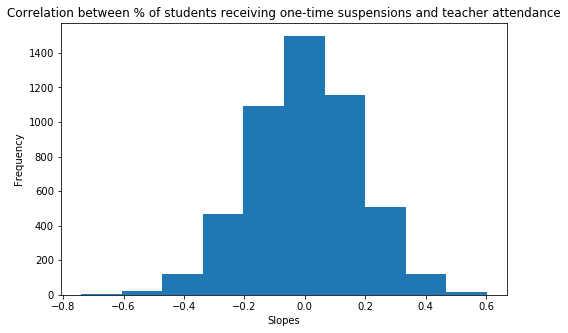

In [206]:
plt.figure(figsize = (8, 5))
plt.xlabel("Slopes")
plt.ylabel("Frequency")
plt.title("Correlation between % of students receiving one-time suspensions and teacher attendance")
plt.hist(slopes)

What is the p value of your observed statistic?

In [207]:
orig_slope

-0.56988288053427683

In [208]:
p_value = np.sum(np.array(slopes) < (orig_slope)) / num_samples

In [209]:
p_value

0.00080000000000000004

Since we have a p-value of ~0, we can reject our null hypothesis and conclude that there is a statistically significant negative correlation between teacher attendance and percent of students receiving one-time suspensions.

## Hypothesis 2: Higher teacher attendance leads to fewer serious incidents

In [210]:
data13.columns.values

array(['Unnamed: 0', 'ULCS_NO', 'INCIDENT_TYPE', 'INCIDENT_COUNT',
       'SCHOOL_ID', 'School Name', 'Total Enrolled', '# Econ Disad',
       '% Econ Disad', 'Native Count', 'Native Percent', 'Asian Count',
       'Asian Percent', 'Black Count', 'Black Percent', 'Hispanic Count',
       'Hispanic Percent', 'Multi Count', 'Multi Percent', 'Pacific Count',
       'Pacific Percent', 'White Count', 'White Percent',
       'total_students_suspended', 'sch_one_time_susp',
       'sch_two_time_susp', 'sch_three_time_susp',
       'sch_more_than_three_susp', 'SCH_TEACHER_ATTEND',
       'SDP_TEACHER_ATTEND'], dtype=object)

In [211]:
# Find serious incidents as a percentage of student enrollment
data13['INCIDENT_COUNT%'] = (data13['INCIDENT_COUNT'] / data13['Total Enrolled']) * 100

In [212]:
data13_1 = data13[['SCH_TEACHER_ATTEND', 'ULCS_NO', 'INCIDENT_COUNT%']]

In [213]:
data13_1.head()

,SCH_TEACHER_ATTEND,ULCS_NO,INCIDENT_COUNT%
0,92.0,5260,0.111857
1,92.0,5260,2.460850
2,92.0,5260,0.000000
3,92.0,5260,0.000000
4,92.0,5260,0.000000


In [214]:
data13_2 = data13_1.pivot_table(['INCIDENT_COUNT%', 'SCH_TEACHER_ATTEND'], index = 'ULCS_NO')

In [215]:
data13_2 = data13_2.reset_index()

In [216]:
data13_2.head()

,ULCS_NO,INCIDENT_COUNT%,SCH_TEACHER_ATTEND
0,1010,0.533748,90.9
1,1020,0.632799,94.5
2,1030,1.135786,93.0
3,1050,0.110988,94.7
4,1100,0.676528,94.1


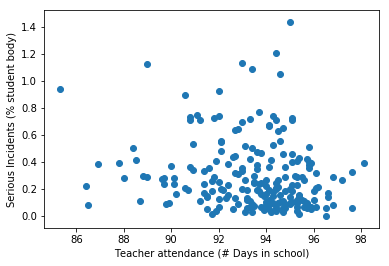

In [217]:
# Plot the data
plt.scatter(data13_2['SCH_TEACHER_ATTEND'], data13_2['INCIDENT_COUNT%'])
plt.xlabel('Teacher attendance (# Days in school)')
plt.ylabel('Serious Incidents (% student body)')

### We can see a negative correlation- is it statistically significant?
## Hypothesis testing <br>
### H0: There is no correlation between teacher attendance and serious incidents, as a percentage of total student body <br>
### H1: There is a negative correlation between teacher attendance and serious incidents

In [218]:
orig_slope_si, b_si = np.polyfit(data13_2['SCH_TEACHER_ATTEND'], data13_2['INCIDENT_COUNT%'], 1)

In [219]:
orig_slope_si

-0.021190434966939155

In [220]:
slopes_si = []
num_samples = 5000
for x in np.arange(1, num_samples): 
    indices = np.random.choice(np.arange(0, len(data13_2)), len(data13_2), replace = False)
    teach_attend_si = data13_2['SCH_TEACHER_ATTEND'][indices]
    score_si = data13_2['INCIDENT_COUNT%']
    m_si, b = np.polyfit(teach_attend_si, score_si, 1)
    slopes_si.append(m_si)

(array([   12.,    54.,   221.,   550.,  1092.,  1315.,  1044.,   529.,
          146.,    36.]),
 array([-0.02903869, -0.02364109, -0.01824349, -0.01284589, -0.00744829,
        -0.00205068,  0.00334692,  0.00874452,  0.01414212,  0.01953972,
         0.02493732]),
 <a list of 10 Patch objects>)

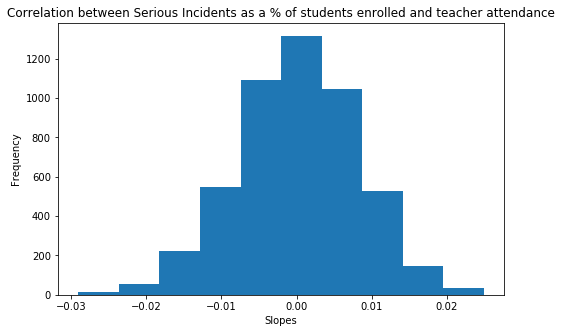

In [221]:
plt.figure(figsize = (8, 5))
plt.xlabel("Slopes")
plt.ylabel("Frequency")
plt.title("Correlation between Serious Incidents as a % of students enrolled and teacher attendance")
plt.hist(slopes_si)

In [222]:
p_value_si = np.sum(np.array(slopes_si) < (orig_slope_si)) / num_samples

In [223]:
p_value_si

0.0057999999999999996

Since we have a p-value of ~0, we can reject our null hypothesis and conclude that there is a statistically significant negative correlation between teacher attendance and serious incidents, as a percentage of total student body.

## Hypothesis 3: Higher teacher attendance leads to better academic rank of school

In [224]:
data14 = pd.read_csv('/Users/naomi/Desktop/CIS105/FinalProject/data/data14.csv')

In [225]:
data12_rnmed = data14.rename(columns = {'SCHOOL_ID_x':'SCHOOL_ID'})

In [226]:
rc12 = pd.read_csv('/Users/naomi/Desktop/CIS105/FinalProject/data/ReportCard/2012/spr_2012.csv')

In [227]:
data12_rc = data12_rnmed.merge(rc12, on='SCHOOL_ID')

In [228]:
data12_rc.head(2)

,Unnamed: 0,ULCS_NO_x,Incident Type,Incident Count,SCHOOL_ID,School Name,% Econ Disad,Total Enrolled,Native Count,Native Percent,...,grad_tier,grad_pts_earned,grad_pts_poss,matric_score,matric_floor,matric_target,matric_pct_earned,matric_tier,matric_pts_earned,matric_pts_poss
0,0,4020,BULLYING,0,402,OVERBROOK HIGH SCHOOL,100%,774,0,0%,...,Intervene,0.42,6,33.16,22.55,79.05,19,Intervene,0.76,4
1,1,4020,DRUGS & ALCOHOL OFFENSE,20,402,OVERBROOK HIGH SCHOOL,100%,774,0,0%,...,Intervene,0.42,6,33.16,22.55,79.05,19,Intervene,0.76,4


In [229]:
data12_rc.columns.values

array(['Unnamed: 0', 'ULCS_NO_x', 'Incident Type', 'Incident Count',
       'SCHOOL_ID', 'School Name', '% Econ Disad', 'Total Enrolled',
       'Native Count', 'Native Percent', 'Asian Count', 'Asian Percent',
       'Black Count', 'Black Percent', 'Hispanic Count',
       'Hispanic Percent', 'Multi Count', 'Multi Percent', 'Pacific Count',
       'Pacific Percent', 'White Count', 'White Percent',
       'total_students_suspended', 'sch_one_time_susp',
       'sch_two_time_susp', 'sch_three_time_susp',
       'sch_more_than_three_susp', 'SCH_TEACHER_ATTEND',
       'SDP_TEACHER_ATTEND', 'ULCS_NO_y', 'pa_school_id', 'report',
       'school_name', 'street_address', 'city', 'state', 'zip_code',
       'phone_number', 'fax_number', 'website', 'gradespan',
       'comprehensive_cte', 'admissions_category', 'turnaround_model',
       'peer_group_number', 'overall_score', 'overall_tier',
       'overall_city_rank', 'overall_city_gap', 'overall_peer_rank',
       'overall_peer_gap', 'ach_sco

In [230]:
data12_rc_1 = data12_rc[['SCHOOL_ID', 'overall_city_rank','SCH_TEACHER_ATTEND' ]]

In [231]:
np.unique(data12_rc['overall_city_rank'])

array(['10th of 25', '10th of 53', '10th of 98', '11th of 98',
       '12th of 53', '12th of 63', '12th of 98', '13th of 25',
       '13th of 53', '13th of 63', '14th of 53', '14th of 63',
       '14th of 98', '15th of 25', '16th of 25', '16th of 53',
       '16th of 63', '17th of 25', '17th of 53', '17th of 98',
       '18th of 53', '18th of 98', '19th of 25', '19th of 53',
       '19th of 63', '19th of 98', '20th of 53', '20th of 63',
       '20th of 98', '21st of 25', '22nd of 25', '22nd of 53',
       '22nd of 63', '23rd of 53', '23rd of 63', '24th of 63',
       '24th of 98', '25th of 53', '26th of 53', '26th of 63',
       '27th of 53', '27th of 63', '28th of 53', '28th of 98',
       '29th of 53', '29th of 63', '29th of 98', '2nd of 25', '2nd of 53',
       '2nd of 63', '2nd of 98', '30th of 98', '31st of 53', '31st of 63',
       '32nd of 98', '34th of 53', '34th of 63', '34th of 98',
       '35th of 53', '36th of 63', '37th of 53', '37th of 98',
       '38th of 63', '39th of 6

In [232]:
def rank_fraction_calc(rank):
    if len(rank) == 9:
        return (int(rank[0]) / int(rank[-3:]))

    elif len(rank) == 10:
        return (int(rank[0:2]) / int(rank[-3:]))
    
    else:
        return 0

In [233]:
data12_rc_1['city rank fraction'] = data12_rc_1['overall_city_rank'].apply(rank_fraction_calc)

/Users/naomi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [234]:
data12_rc_1.head()

,SCHOOL_ID,overall_city_rank,SCH_TEACHER_ATTEND,city rank fraction
0,402,46th of 53,92.7,0.867925
1,402,46th of 53,92.7,0.867925
2,402,46th of 53,92.7,0.867925
3,402,46th of 53,92.7,0.867925
4,402,46th of 53,92.7,0.867925


In [235]:
data12_rc_2 = data12_rc_1.pivot_table(['city rank fraction', 'SCH_TEACHER_ATTEND'], index = 'SCHOOL_ID')

In [236]:
data12_rc_2.head()

,SCH_TEACHER_ATTEND,city rank fraction
SCHOOL_ID,,
101,91.1,0.584906
102,93.6,0.924528
103,93.8,0.471698
105,95.0,0.433962
110,88.3,0.981132


In [237]:
data12_rc_2 = data12_rc_2.reset_index()

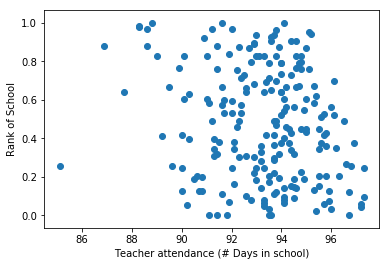

In [238]:
# Plot the data
plt.scatter(data12_rc_2['SCH_TEACHER_ATTEND'], data12_rc_2['city rank fraction'])
plt.xlabel('Teacher attendance (# Days in school)')
plt.ylabel('Rank of School')

Note that in this plot, a lower rank is better because, for example, being ranked 77/78 is a high percentage, but is actually a bad ranking. Thus, the plot makes sense- schools with higher teacher attendance should see better school rankings.

### We can see a negative correlation- is it statistically significant?
## Hypothesis testing <br>
### H0: There is no correlation between teacher attendance and city rank fraction <br>
### H1: There is a negative correlation between teacher attendance and city rank fraction

In [239]:
orig_slope_rc, b_rc = np.polyfit(data12_rc_2['SCH_TEACHER_ATTEND'], data12_rc_2['city rank fraction'], 1)

In [240]:
orig_slope_rc

-0.029092834982965436

In [241]:
slopes_rc = []
num_samples = 5000
for x in np.arange(1, num_samples): 
    indices_rc = np.random.choice(np.arange(0, len(data12_rc_2)), len(data12_rc_2), replace = False)
    teach_attend_rc = data12_rc_2['SCH_TEACHER_ATTEND'][indices_rc]
    score_rc = data12_rc_2['city rank fraction']
    m_rc, b = np.polyfit(teach_attend_rc, score_rc, 1)
    slopes_rc.append(m_rc)

(array([    2.,    32.,   180.,   605.,  1228.,  1423.,  1014.,   402.,
           99.,    14.]),
 array([-0.03847182, -0.03119199, -0.02391216, -0.01663233, -0.0093525 ,
        -0.00207266,  0.00520717,  0.012487  ,  0.01976683,  0.02704666,
         0.03432649]),
 <a list of 10 Patch objects>)

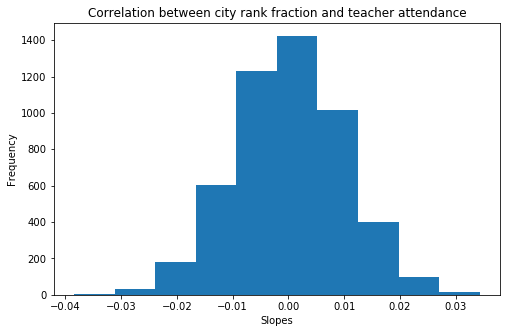

In [242]:
plt.figure(figsize = (8, 5))
plt.xlabel("Slopes")
plt.ylabel("Frequency")
plt.title("Correlation between city rank fraction and teacher attendance")
plt.hist(slopes_rc)

In [243]:
p_value_rc = np.sum(np.array(slopes_rc) < (orig_slope_rc)) / num_samples

In [244]:
p_value_rc

0.001

Since we have a p-value of ~0, we can reject our null hypothesis and conclude that there is a statistically significant negative correlation between teacher attendance and rank of school.

# Part 2: Hypotheses regarding factors that affect teacher attendance: school environment, weather, and teacher salary

## Hypothesis 4: Better school environment leads to higher teacher attendance

In [245]:
rc13 = pd.read_csv('/Users/naomi/Desktop/CIS105/FinalProject/data/ReportCard/2013/spr_2013.csv')

In [246]:
ta13.columns

Index(['ULCS_NO', 'SCHOOL_YEAR', 'SCH_TEACHER_ATTEND', 'SDP_TEACHER_ATTEND',
       'SCHOOL_ID'],
      dtype='object')

In [247]:
merged2 = rc13.merge(ta13, on='ULCS_NO')

In [248]:
np.unique(merged2['clim_score'])

array(['10', '100', '11', '12', '13', '14', '15', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '32', '33',
       '34', '35', '36', '38', '39', '4', '40', '41', '42', '43', '44',
       '45', '46', '47', '49', '5', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '69', '7', '70', '72', '73', '74', '75', '76', '78', '79',
       '8', '80', '82', '83', '84', '85', '86', '88', '89', '9', '90',
       '91', '92', '93', '94', '96', '97', '98', '99', 'Less than 10'], dtype=object)

In [249]:
# Clean up clim_score column. Since we have 'Less than 10' we'll replace that with 5.
merged2['clim_score'] = merged2['clim_score'].str.replace('Less than 10', '5')

In [250]:
# Convert all strings in the array to ints
merged2['clim_score'] = [int(i) for i in merged2['clim_score']]

In [251]:
np.unique(merged2['clim_score'])

array([  4,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  32,  33,
        34,  35,  36,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  69,  70,  72,  73,  74,  75,  76,
        78,  79,  80,  82,  83,  84,  85,  86,  88,  89,  90,  91,  92,
        93,  94,  96,  97,  98,  99, 100])

In [252]:
np.unique(merged2['SCH_TEACHER_ATTEND'])

array([ 85.3,  86.4,  86.5,  86.9,  87.8,  88. ,  88.4,  88.5,  88.7,
        88.8,  89. ,  89.6,  89.7,  89.8,  89.9,  90. ,  90.1,  90.2,
        90.6,  90.7,  90.8,  90.9,  91.1,  91.2,  91.4,  91.5,  91.6,
        91.7,  91.8,  91.9,  92. ,  92.1,  92.2,  92.3,  92.4,  92.6,
        92.7,  92.8,  93. ,  93.1,  93.2,  93.3,  93.4,  93.5,  93.6,
        93.7,  93.8,  93.9,  94. ,  94.1,  94.2,  94.3,  94.4,  94.5,
        94.6,  94.7,  94.8,  95. ,  95.1,  95.2,  95.3,  95.4,  95.5,
        95.6,  95.7,  95.8,  95.9,  96. ,  96.1,  96.2,  96.5,  96.6,
        96.8,  97.2,  97.6,  98.1])

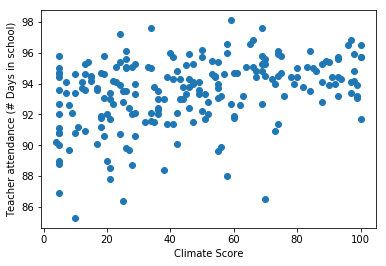

In [253]:
# Plot the data
plt.scatter(merged2['clim_score'], merged2['SCH_TEACHER_ATTEND'])
plt.xlabel('Climate Score')
plt.ylabel('Teacher attendance (# Days in school)')

In [254]:
orig_slope2, b2 = np.polyfit(merged2['clim_score'], merged2['SCH_TEACHER_ATTEND'], 1)

In [255]:
orig_slope2

0.028113277811195794

### We can see a slightly positive correlation- is it statistically significant?
## Hypothesis testing <br>
### H0: There is no correlation between teacher attendance and school climate <br>
### H1: There is a positive correlation between teacher attendance and school climate

In [256]:
slopes2 = []
num_samples2 = 5000
for x in np.arange(1, num_samples2): 
    indices2 = np.random.choice(np.arange(0, len(merged2)), len(merged2), replace = False)
    teach_attend = merged2['SCH_TEACHER_ATTEND']
    score2 = merged2['clim_score'][indices2]
    new_slope, new_b = np.polyfit(score2, teach_attend, 1)
    slopes2.append(new_slope)

(array([    6.,    72.,   313.,   920.,  1481.,  1338.,   666.,   168.,
           29.,     6.]),
 array([-0.01999457, -0.01580836, -0.01162215, -0.00743594, -0.00324973,
         0.00093647,  0.00512268,  0.00930889,  0.0134951 ,  0.01768131,
         0.02186752]),
 <a list of 10 Patch objects>)

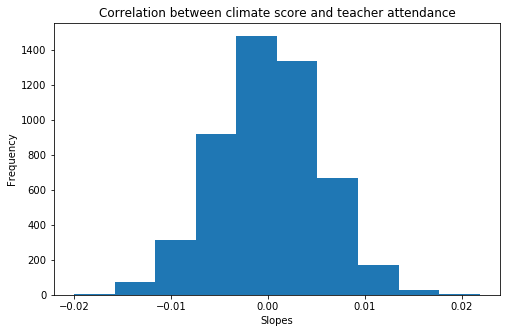

In [257]:
plt.figure(figsize = (8, 5))
plt.xlabel("Slopes")
plt.ylabel("Frequency")
plt.title("Correlation between climate score and teacher attendance")
plt.hist(slopes2)

In [258]:
p_value2 = np.sum(np.array(slopes2) > (orig_slope2)) / num_samples2

In [259]:
p_value2

0.0

Since we have a p-value of 0, we can reject our null hypothesis and conclude that there is a statistically significant negative correlation between teacher attendance and school climate.

## Hypothesis 5: Better weather leads to higher teacher attendance

In [260]:
ta12 = pd.read_csv('/Users/naomi/Desktop/CIS105/FinalProject/data/TeacherAttendance/attendance_2012.csv')

In [261]:
ta12.columns

Index(['ULCS_NO', 'SCHOOL_YEAR', 'SCH_TEACHER_ATTEND', 'SDP_TEACHER_ATTEND',
       'SCHOOL_ID'],
      dtype='object')

In [262]:
ta14 = pd.read_csv('/Users/naomi/Desktop/CIS105/FinalProject/data/TeacherAttendance/attendance_2014.csv')

In [263]:
ta15 = pd.read_csv('/Users/naomi/Desktop/CIS105/FinalProject/data/TeacherAttendance/attendance_2015.csv')

In [264]:
ta15.columns

Index(['School Year', 'ULCS', 'SCHOOL_ID', 'Teacher Attd %', 'SDP Avg'], dtype='object')

In [265]:
weather_data_12 = pd.read_csv('/Users/naomi/Desktop/CIS105/FinalProject/data/philly_weather_2012.csv')

In [266]:
len(weather_data_12['Events'])

303

In [267]:
weather_data_12['Events'] = weather_data_12['Events'].fillna(value='None')

In [268]:
#count the number of bad weather days
weather_data_12_bad = len(weather_data_12[weather_data_12['Events'].str.contains('Rain')]) + len(weather_data_12[weather_data_12['Events'].str.contains('Snow')]) + len(weather_data_12[weather_data_12['Events'].str.contains('Thunderstorm')])

In [269]:
weather_data_12_bad

164

In [270]:
weather_data_12_bad = (weather_data_12_bad / len(weather_data_12['Events'])) * 100

In [271]:
weather_data_12_bad

54.12541254125413

In [272]:
weather_data_13 = pd.read_csv('/Users/naomi/Desktop/CIS105/FinalProject/data/philly_weather_2013.csv')

In [273]:
len(weather_data_13['Events'])

303

In [274]:
weather_data_13['Events'] = weather_data_13['Events'].fillna(value='None')

In [275]:
weather_data_13_bad = len(weather_data_13[weather_data_13['Events'].str.contains('Rain')]) + len(weather_data_13[weather_data_13['Events'].str.contains('Snow')]) + len(weather_data_13[weather_data_13['Events'].str.contains('Thunderstorm')])

In [276]:
weather_data_13_bad = (weather_data_13_bad / len(weather_data_13['Events'])) * 100

In [277]:
weather_data_13_bad

53.46534653465347

In [278]:
weather_data_14 = pd.read_csv('/Users/naomi/Desktop/CIS105/FinalProject/data/philly_weather_2014.csv')

In [279]:
len(weather_data_14['Events'])

303

In [280]:
weather_data_14['Events'] = weather_data_14['Events'].fillna(value='None')

In [281]:
weather_data_14_bad = len(weather_data_14[weather_data_14['Events'].str.contains('Rain')]) + len(weather_data_14[weather_data_14['Events'].str.contains('Snow')]) + len(weather_data_14[weather_data_14['Events'].str.contains('Thunderstorm')])

In [282]:
weather_data_14_bad = (weather_data_14_bad / len(weather_data_14['Events'])) * 100

In [283]:
weather_data_14_bad

54.12541254125413

In [284]:
weather_data_15 = pd.read_csv('/Users/naomi/Desktop/CIS105/FinalProject/data/philly_weather_2015.csv')

In [285]:
len(weather_data_15['Events'])

304

In [286]:
weather_data_15['Events'] = weather_data_15['Events'].fillna(value='None')

In [287]:
weather_data_15_bad = len(weather_data_15[weather_data_15['Events'].str.contains('Rain')]) + len(weather_data_15[weather_data_15['Events'].str.contains('Snow')]) + len(weather_data_15[weather_data_15['Events'].str.contains('Thunderstorm')])

In [288]:
weather_data_15_bad = (weather_data_15_bad / len(weather_data_15['Events'])) * 100

In [289]:
weather_data_15_bad

49.67105263157895

In [290]:
avg_attend_12 = (np.mean(ta12['SCH_TEACHER_ATTEND']) / 188) * 100

In [291]:
avg_attend_12

99.70921985815602

In [292]:
avg_attend_13 = np.mean(ta13['SCH_TEACHER_ATTEND'])

In [293]:
avg_attend_13

93.43160377358491

In [294]:
avg_attend_14 = np.mean(ta14['SCH_TEACHER_ATTEND'])

In [295]:
avg_attend_14

93.30762331838555

In [296]:
avg_attend_15 = np.mean(ta15['Teacher Attd %'])

In [297]:
avg_attend_15

93.9834101382489

In [298]:
# Make a df out of this information
d = {'Bad Weather Days (%)': [weather_data_12_bad, weather_data_13_bad, weather_data_14_bad, weather_data_15_bad], 'Avg. Teacher Attendance (%)': [avg_attend_12, avg_attend_13, avg_attend_14, avg_attend_15]}

In [299]:
df = pd.DataFrame(data=d, index=['SY 2012', 'SY 2013', 'SY 2014', 'SY 2015'])

In [300]:
df = df.reset_index()

In [301]:
df

,index,Avg. Teacher Attendance (%),Bad Weather Days (%)
0,SY 2012,99.709220,54.125413
1,SY 2013,93.431604,53.465347
2,SY 2014,93.307623,54.125413
3,SY 2015,93.983410,49.671053


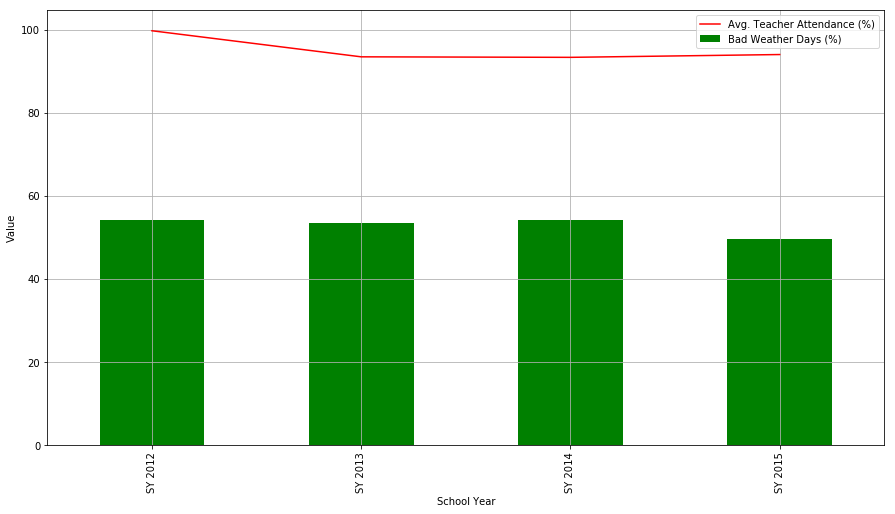

In [302]:
# Plot the data
fig, ax = plt.subplots(figsize = (15,8))
df.plot(x = ['index'], y = ['Avg. Teacher Attendance (%)'], kind = 'line', color = 'red', ax = ax)
df.plot(x = ['index'], y = ['Bad Weather Days (%)'], kind = 'bar', color = 'green', ax = ax)
plt.xlabel('School Year')
plt.ylabel('Value')
plt.grid('on')

Since we don't have granular data on teacher attendance (i.e. we only have school-year-level data, not daily data) we can't conclude much from this graph. We still included it because we thought the method was interesting.

## Hypothesis 6: Better salaries lead to higher teacher attendance

In [303]:
emp13 = pd.read_csv('/Users/naomi/Desktop/CIS105/FinalProject/data/Employee/Jul2013/Employee_info_2013.csv')

In [304]:
np.unique(emp13['ULCS_NO'])

array([1010, 1011, 1020, 1027, 1030, 1050, 1100, 1120, 1130, 1160, 1168,
       1190, 1200, 1201, 1230, 1231, 1250, 1251, 1260, 1280, 1290, 1300,
       1301, 1330, 1340, 1350, 1353, 1360, 1363, 1370, 1380, 1381, 1390,
       1400, 1402, 1410, 1420, 1440, 1450, 1460, 1465, 1470, 1475, 1490,
       1492, 1580, 1970, 2000, 2003, 2010, 2020, 2090, 2110, 2120, 2121,
       2140, 2160, 2190, 2200, 2210, 2215, 2240, 2242, 2260, 2261, 2290,
       2310, 2320, 2340, 2360, 2370, 2371, 2372, 2380, 2390, 2392, 2410,
       2450, 2455, 2470, 2480, 2490, 2492, 2510, 2512, 2520, 2530, 2540,
       2580, 2581, 2590, 2595, 2620, 2630, 2632, 2640, 2641, 2650, 2670,
       2690, 2692, 2720, 2730, 2770, 3050, 3190, 3290, 3303, 3312, 3323,
       3357, 3358, 3390, 3396, 3398, 3407, 3409, 3415, 3419, 3420, 3425,
       3426, 3510, 3610, 3620, 3640, 3650, 3660, 3680, 3700, 3750, 4020,
       4030, 4060, 4100, 4140, 4150, 4190, 4220, 4227, 4240, 4263, 4270,
       4280, 4300, 4309, 4310, 4320, 4350, 4370, 43

In [305]:
emp13['ULCS_NO'] = [int(i) for i in emp13['ULCS_NO']]

In [306]:
merged4 = emp13.merge(ta13, on='ULCS_NO')

In [307]:
merged4.columns

Index(['LAST_NAME', 'FIRST_NAME', 'PAY_RATE_TYPE', 'PAY_RATE',
       'TITLE_DESCRIPTION', 'ULCS_NO', 'HOME_ORGANIZATION_DESCRIPTION',
       'ORGANIZATION_LEVEL', 'TYPE_OF_REPRESENTATION', 'GENDER', 'RUN_DATE',
       'SCHOOL_YEAR', 'SCH_TEACHER_ATTEND', 'SDP_TEACHER_ATTEND', 'SCHOOL_ID'],
      dtype='object')

In [308]:
merged4_pivot = merged4.pivot_table('PAY_RATE', index='SCH_TEACHER_ATTEND')

In [309]:
merged4_pivot = merged4_pivot.reset_index()

In [310]:
merged4_pivot['PAY_RATE'] = merged4_pivot['PAY_RATE']/1000

In [311]:
merged4_pivot

,SCH_TEACHER_ATTEND,PAY_RATE
0,85.3,46.735207
1,86.4,48.034769
2,86.5,51.148048
3,86.9,49.179021
4,87.8,51.392357
5,88.0,53.036373
6,88.4,50.303786
7,88.5,46.167188
8,88.7,48.142852
9,88.8,45.375129


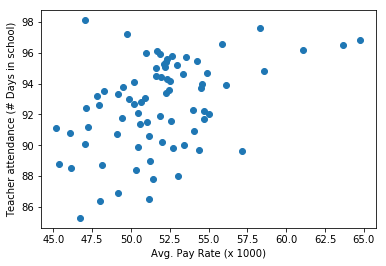

In [312]:
# Plot the data
plt.scatter(merged4_pivot['PAY_RATE'], merged4_pivot['SCH_TEACHER_ATTEND'])
plt.xlabel('Avg. Pay Rate (x 1000)')
plt.ylabel('Teacher attendance (# Days in school)')

In [313]:
orig_slope4, b4 = np.polyfit(merged4_pivot['PAY_RATE'], merged4_pivot['SCH_TEACHER_ATTEND'], 1)

In [314]:
orig_slope4

0.3410601979941541

### We can see a positive correlation- is it statistically significant?
## Hypothesis testing <br>
### H0: There is no correlation between teacher attendance and teacher salary <br>
### H1: There is a positive correlation between teacher attendance and teacher salary

In [315]:
slopes4 = []
num_samples4 = 5000
for x in np.arange(1, num_samples4): 
    indices4 = np.random.choice(np.arange(0, len(merged4_pivot)), len(merged4_pivot), replace = False)
    teach_attend = merged4_pivot['SCH_TEACHER_ATTEND']
    score4 = merged4_pivot['PAY_RATE'][indices4]
    new_slope, new_b = np.polyfit(score4, teach_attend, 1)
    slopes4.append(new_slope)

(array([   15.,    96.,   308.,   701.,  1173.,  1311.,   884.,   393.,
          107.,    11.]),
 array([-0.31069942, -0.24987607, -0.18905273, -0.12822938, -0.06740603,
        -0.00658269,  0.05424066,  0.115064  ,  0.17588735,  0.2367107 ,
         0.29753404]),
 <a list of 10 Patch objects>)

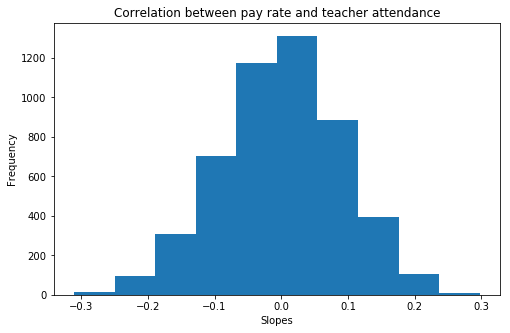

In [316]:
plt.figure(figsize = (8, 5))
plt.xlabel("Slopes")
plt.ylabel("Frequency")
plt.title("Correlation between pay rate and teacher attendance")
plt.hist(slopes4)

In [317]:
p_value4 = np.sum(np.array(slopes4) > orig_slope4)/ num_samples4

In [318]:
p_value4

0.0

Since we have a p-value of ~0, we can reject our null hypothesis and conclude that there is a statistically significant positive correlation between teacher attendance and teacher salary.